<a href="https://colab.research.google.com/github/amit-kumar9766/Deeplearning.ai/blob/master/Singapore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import io
import pickle

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv to singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv
User uploaded file "singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv" with length 942898 bytes


In [0]:
import pandas as pd
df=pd.read_csv('singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv')

In [174]:
df.head()

,year,level_1,level_2,value
0,1957,Total Residents,0 - 4 Years,264727
1,1957,Total Residents,5 - 9 Years,218097
2,1957,Total Residents,10 - 14 Years,136280
3,1957,Total Residents,15 - 19 Years,135679
4,1957,Total Residents,20 - 24 Years,119266


In [175]:
df.shape

(20460, 4)

In [0]:
#Largest ethnic group in Singapore

In [147]:
df.dtypes

year        int64
level_1    object
level_2    object
value      object
dtype: object

In [0]:
df['value'] = df['value'].apply(pd.to_numeric, errors='coerce')

In [177]:
df.shape

(20460, 4)

In [0]:
A=df.groupby('level_1') ["value"].sum()


In [179]:
A

level_1
Other Ethnic Groups (Females)      1886349.0
Other Ethnic Groups (Males)        1753101.0
Other Ethnic Groups (Total)        3639417.0
Total Chinese                    148157861.0
Total Female Chinese              75942931.0
Total Female Indians               6528837.0
Total Female Malays               12809553.0
Total Female Residents            97167570.0
Total Indians                     14563406.0
Total Malays                      25814830.0
Total Male Chinese                72214945.0
Total Male Indians                 8034588.0
Total Male Malays                 13005325.0
Total Male Residents              95007879.0
Total Residents                  192175418.0
Name: value, dtype: float64

In [151]:
A=A.sort_values(kind='mergesort')
print(A)

level_1
Other Ethnic Groups (Males)        1753101.0
Other Ethnic Groups (Females)      1886349.0
Other Ethnic Groups (Total)        3639417.0
Total Female Indians               6528837.0
Total Male Indians                 8034588.0
Total Female Malays               12809553.0
Total Male Malays                 13005325.0
Total Indians                     14563406.0
Total Malays                      25814830.0
Total Male Chinese                72214945.0
Total Female Chinese              75942931.0
Total Male Residents              95007879.0
Total Female Residents            97167570.0
Total Chinese                    148157861.0
Total Residents                  192175418.0
Name: value, dtype: float64


In [0]:
A.sum()


768702010.0

In [0]:
percent=(192175418.0/768702010.0)
percent

0.2499998900744386

In [0]:
#Total Residents is the largest ethnic group and they compromise about 25%

In [0]:
#Average of total residents over the years
A=df[df['level_1']=='Total Residents']
A=A.groupby('year')['value'].mean()


In [189]:
A.shape

(62,)

In [190]:
A.tail(2)

year
2017    231350.727273
2018    235680.772727
Name: value, dtype: float64

In [191]:
A.head(1)

year
1957    68281.954545
Name: value, dtype: float64

In [196]:
averagegrowth = (235680.772727-68281.954545)/61
averagegrowth

2744.2429210163937

In [0]:
# 2745 is the avg growth 

In [183]:
B=df.groupby('level_2') ["value"].sum()
B

level_2
0  -  4 Years      56334880.0
10 - 14 Years      57838966.0
15 - 19 Years      56301016.0
20 - 24 Years      55078706.0
25 - 29 Years      56147405.0
30 - 34 Years      55688454.0
35 - 39 Years      52935226.0
40 - 44 Years      48600165.0
45 - 49 Years      43314851.0
5  -  9 Years      58076186.0
50 - 54 Years      37397546.0
55 - 59 Years      30750972.0
60 - 64 Years      23988284.0
65 - 69 Years      17672497.0
65 Years & Over    45746835.0
70 - 74 Years      10642861.0
70 Years & Over    28074338.0
75 - 79 Years       6313037.0
75 Years & Over    14530277.0
80 - 84 Years       3761021.0
80 Years & Over     6648274.0
85 Years & Over     2860213.0
Name: value, dtype: float64

In [0]:
B=B.sort_values(kind='mergesort')
print(B)

level_2
85 Years & Over     2860213.0
80 - 84 Years       3761021.0
75 - 79 Years       6313037.0
80 Years & Over     6648274.0
70 - 74 Years      10642861.0
75 Years & Over    14530277.0
65 - 69 Years      17672497.0
60 - 64 Years      23988284.0
70 Years & Over    28074338.0
55 - 59 Years      30750972.0
50 - 54 Years      37397546.0
45 - 49 Years      43314851.0
65 Years & Over    45746835.0
40 - 44 Years      48600165.0
35 - 39 Years      52935226.0
20 - 24 Years      55078706.0
30 - 34 Years      55688454.0
25 - 29 Years      56147405.0
15 - 19 Years      56301016.0
0  -  4 Years      56334880.0
10 - 14 Years      57838966.0
5  -  9 Years      58076186.0
Name: value, dtype: float64


In [0]:
#5-9 years has the maximum

In [185]:
percent=(58076186.0/768702010.0)
percent
#totalperc =  perc.groupby(level=0).apply(lambda x: 100 * x / N).reset_index(name='% of total n')



0.07555097455774833

In [0]:
#5-9 compromises of the largest age group with about 7.5% of the total population

In [0]:
A=df[df['level_2']=='5  -  9 Years']
A=A.groupby('year')['value'].mean()

In [211]:
A.tail(1)

year
2018    53084.266667
Name: value, dtype: float64

In [212]:
A.head(1)

year
1957    58159.2
Name: value, dtype: float64

In [214]:
(53084.266667- 58159.2)/61

-83.19562840983596

In [0]:
-83 is the negative average growth rate

In [0]:
##Identify the group (by age, ethnicity and gender) that:
a. Has shown the highest growth rate
b. Has shown the lowest growth rate
c. Has remained the same
4. Plot a graph for population trends

In [0]:
[Other Ethnic Groups (Males) , Other Ethnic Groups (Females), Other Ethnic Groups (Total) , Total Female Indians   ,  Total Male Indians  ,  Total Female Malays ,              
Total Male Malays , Total Indians     , Total Malays , Total Male Chinese ,Total Female Chinese ,  Total Male Residents , Total Female Residents  ,   Total Chinese ,                  
Total Residents ]

SyntaxError: ignored

In [0]:
#on basis of ethnic groups
C=df[df['level_1']=='Other Ethnic Groups (Total)']
D=df[df['level_1']=='Total Indians']
E=df[df['level_1']=='Total Malays']
F=df[df['level_1']=='Total Chinese']
G=df[df['level_1']=='Total Residents']

In [0]:
#on basis of gender
H=df[df['level_1']=='Other Ethnic Groups (Males)']
I=df[df['level_1']=='Other Ethnic Groups (Females)']
J=df[df['level_1']=='Total Female Indians']
K=df[df['level_1']=='Total Male Indians']
L=df[df['level_1']=='Total Female Malays']
M=df[df['level_1']== 'Total Male Malays']
N=df[df['level_1']== 'Total Female Chinese']


In [0]:
A=df.groupby(['level_1','year']).agg({'value':'sum'}).reset_index()

In [0]:
x=A['level_1'].unique()

In [0]:
b=[]
import matplotlib.pyplot as plt
for i  in x:
  z=A[A['level_1']==i]
  b.append(z)
  #print(z)

Text(0, 0.5, 'population of Other Ethnic Groups')

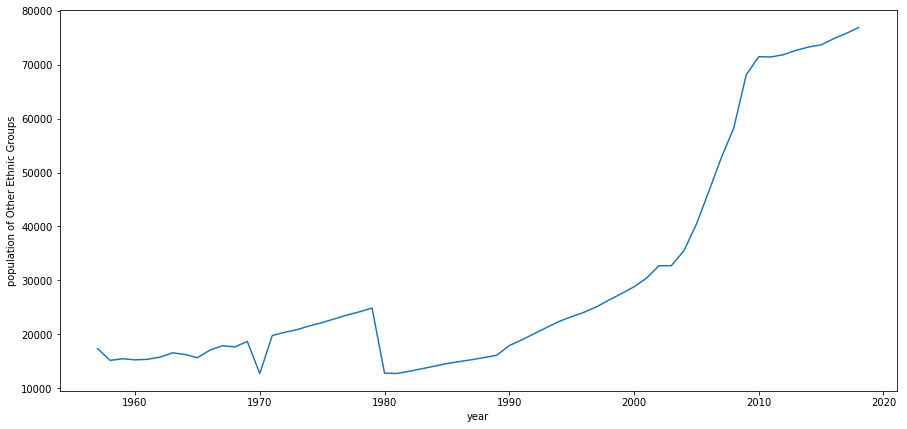

In [226]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=b[0]['value']
y=b[0]['year']
plt.plot(y,x)
plt.xlabel('year')
plt.ylabel('population of Other Ethnic Groups')

In [242]:
f=b[0]
f[f['year']==1957]['value']

0    17370.0
Name: value, dtype: float64

In [243]:
f[f['year']==2018]['value']

61    76846.0
Name: value, dtype: float64

In [245]:
Growthrate=(78646.0-17370.0)/17370
Growthrate

3.52769142199194

In [0]:
Total growth rate is 352%

Text(0, 0.5, 'population of Other Ethnic Groups')

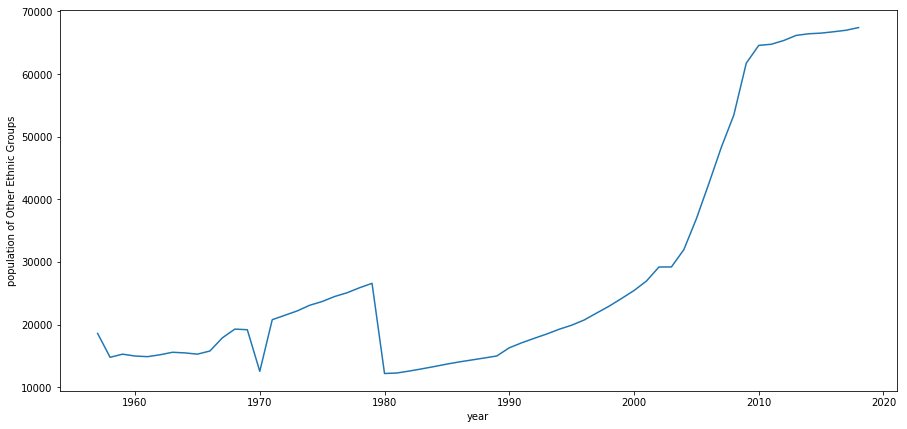

In [246]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=b[1]['value']
y=b[2]['year']
plt.plot(y,x)
plt.xlabel('year')
plt.ylabel('population of Other Ethnic Groups')

Text(0, 0.5, 'population of Other Ethnic Groups')

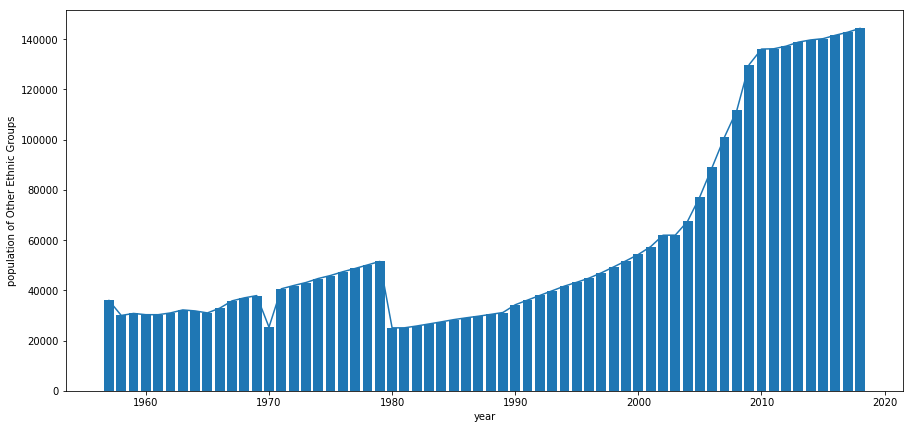

In [249]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=b[2]['value']
y=b[2]['year']
plt.bar(y,x)
plt.plot(y,x)
plt.xlabel('year')
plt.ylabel('population of Other Ethnic Groups')

<BarContainer object of 1364 artists>

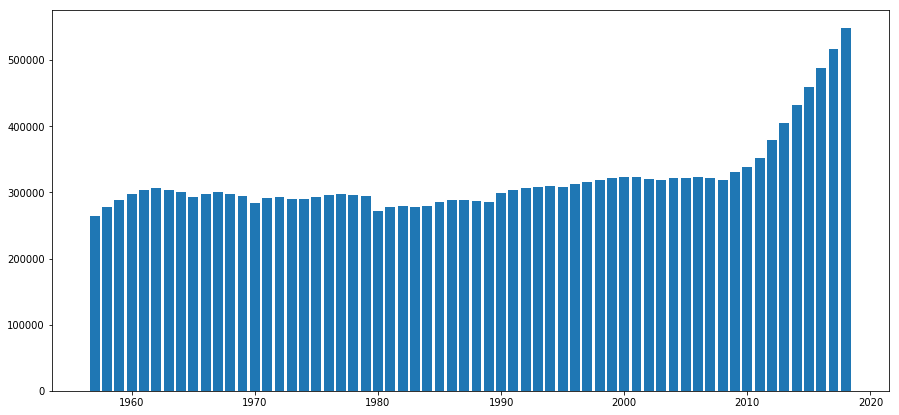

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=b[4]['value']
y=b[4]['year']
plt.bar(y,x)
plt.plot(y,x)
plt.xlabel('year')
plt.ylabel('population of Other Ethnic Groups')

<BarContainer object of 1364 artists>

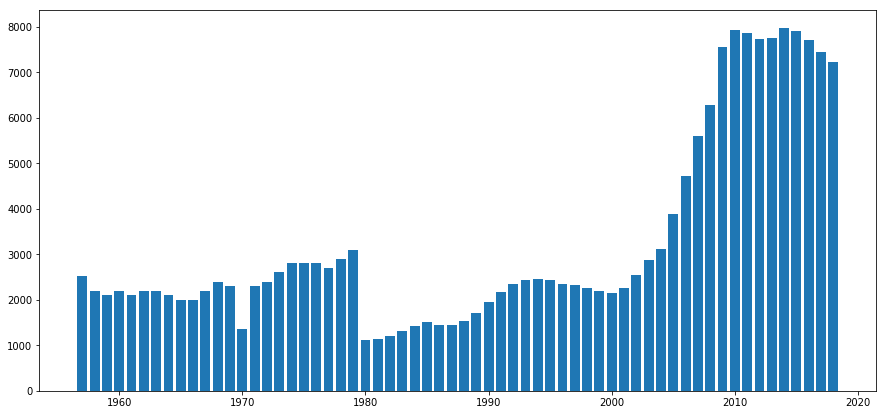

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=H['value']
y=C['year']
plt.bar(y,x)

<BarContainer object of 1364 artists>

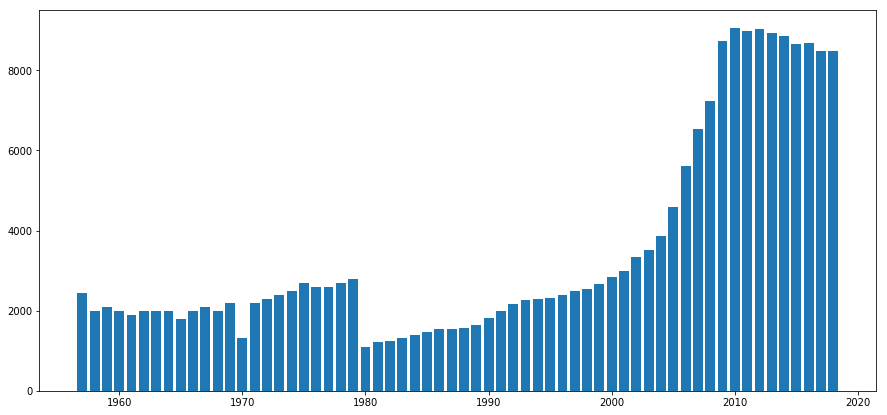

In [0]:

plt.figure(figsize=(15,7))
x=I['value']
y=C['year']
plt.bar(y,x)

<BarContainer object of 1364 artists>

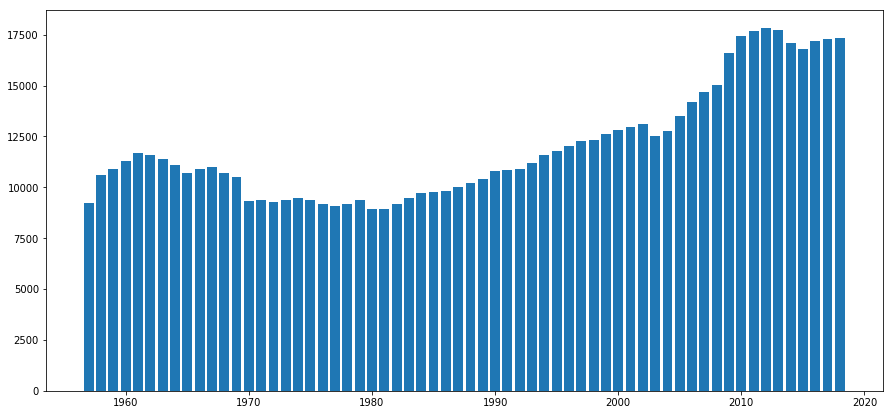

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=J['value']
y=C['year']
plt.bar(y,x)

<BarContainer object of 1364 artists>

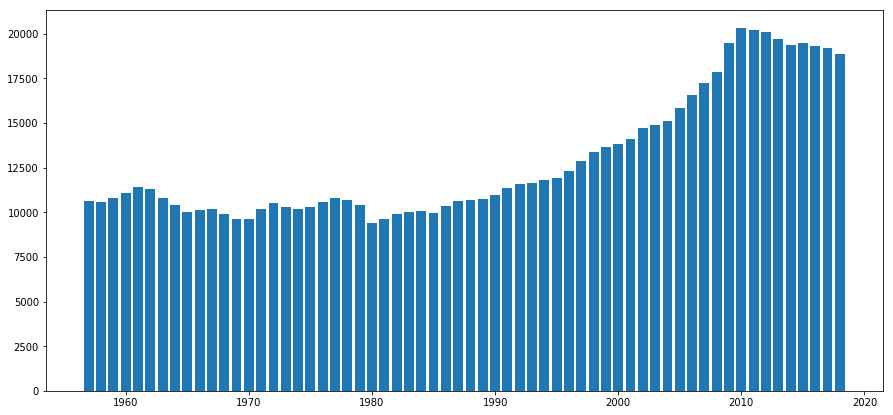

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=K['value']
y=C['year']
plt.bar(y,x)

<BarContainer object of 1364 artists>

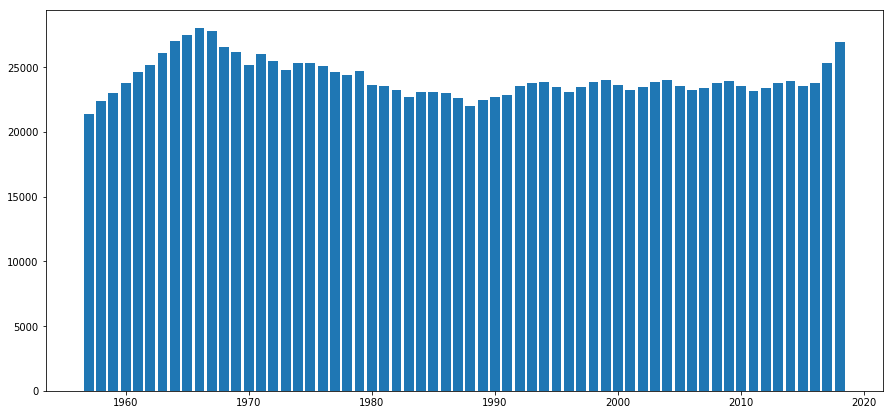

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=L['value']
y=C['year']
plt.bar(y,x)

<BarContainer object of 1364 artists>

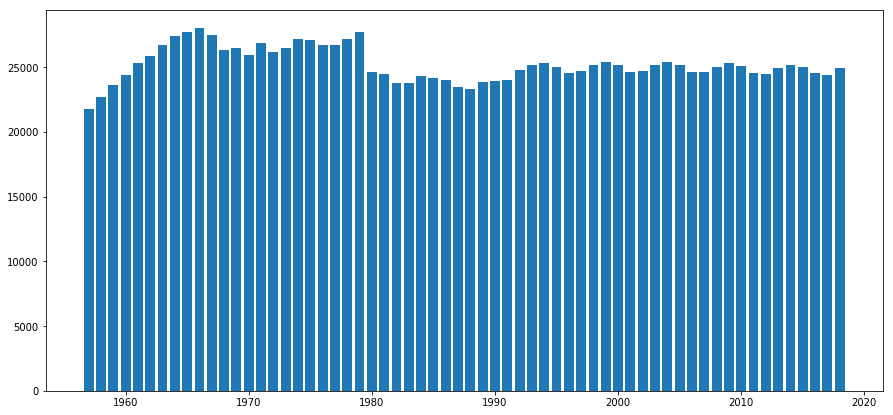

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=M['value']
y=C['year']
plt.bar(y,x)

<BarContainer object of 1364 artists>

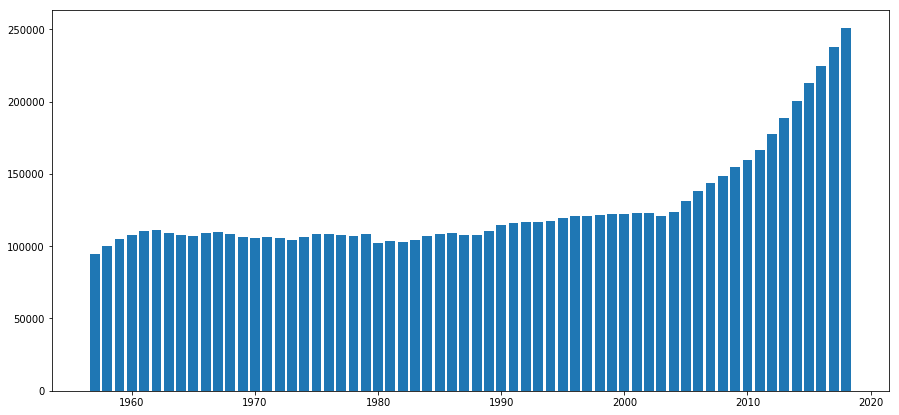

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
x=N['value']
y=C['year']
plt.bar(y,x)

In [0]:
New=df['level_2']

In [0]:
df.groupby('level_2')['value'].sum()

level_2
0  -  4 Years      56334880.0
10 - 14 Years      57838966.0
15 - 19 Years      56301016.0
20 - 24 Years      55078706.0
25 - 29 Years      56147405.0
30 - 34 Years      55688454.0
35 - 39 Years      52935226.0
40 - 44 Years      48600165.0
45 - 49 Years      43314851.0
5  -  9 Years      58076186.0
50 - 54 Years      37397546.0
55 - 59 Years      30750972.0
60 - 64 Years      23988284.0
65 - 69 Years      17672497.0
65 Years & Over    45746835.0
70 - 74 Years      10642861.0
70 Years & Over    28074338.0
75 - 79 Years       6313037.0
75 Years & Over    14530277.0
80 - 84 Years       3761021.0
80 Years & Over     6648274.0
85 Years & Over     2860213.0
Name: value, dtype: float64

In [0]:
A=df.groupby(['level_2','year']).agg({'value':'sum'}).reset_index()


In [82]:
A.head()

,level_2,year,value
0,0 - 4 Years,1957,1058908.0
1,0 - 4 Years,1958,1111200.0
2,0 - 4 Years,1959,1155200.0
3,0 - 4 Years,1960,1188000.0
4,0 - 4 Years,1961,1214800.0


In [0]:
b=[]
x=A['level_2'].unique()

In [0]:
import matplotlib.pyplot as plt
for i  in x:
  z=A[A['level_2']==i]
  b.append(z)
  #print(z)
  

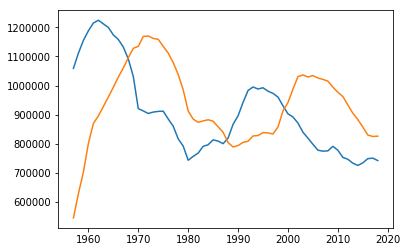

In [104]:
plt.plot(b[0]['year'],b[0]['value'])
plt.plot(b[1]['year'],b[1]['value'])

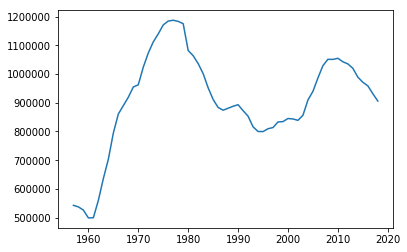

In [105]:
plt.plot(b[2]['year'],b[2]['value'])

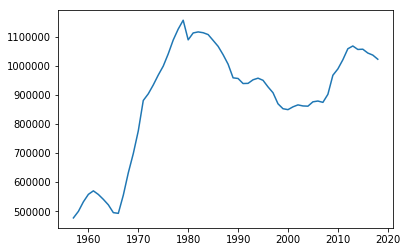

In [106]:
plt.plot(b[3]['year'],b[3]['value'])

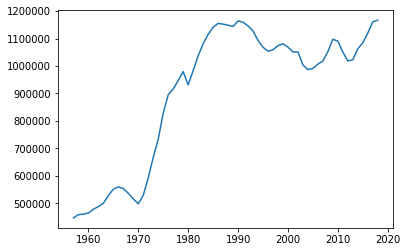

In [107]:
plt.plot(b[4]['year'],b[4]['value'])

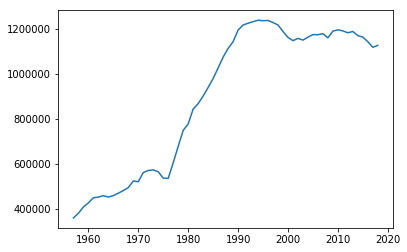

In [108]:
plt.plot(b[5]['year'],b[5]['value'])

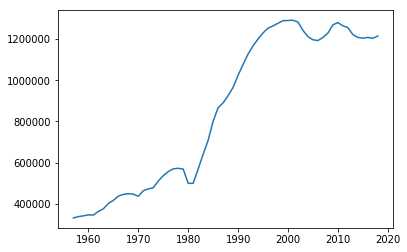

In [109]:
plt.plot(b[6]['year'],b[6]['value'])

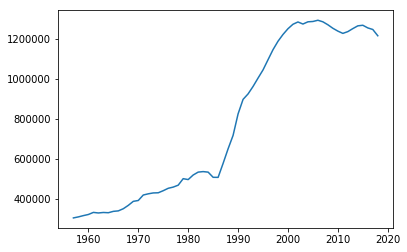

In [110]:
plt.plot(b[7]['year'],b[7]['value'])

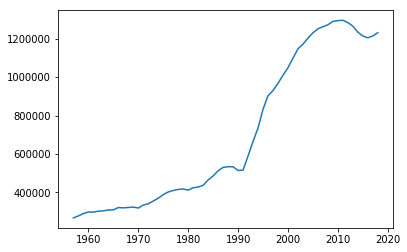

In [111]:
plt.plot(b[8]['year'],b[8]['value'])

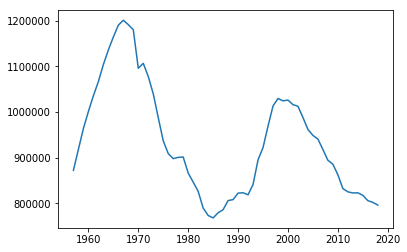

In [112]:
plt.plot(b[9]['year'],b[9]['value'])

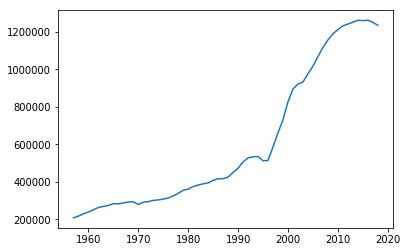

In [113]:
plt.plot(b[10]['year'],b[10]['value'])

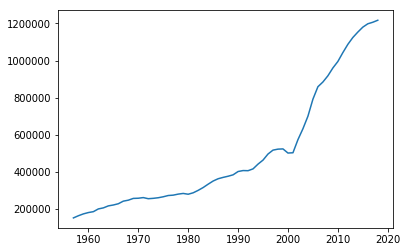

In [114]:
plt.plot(b[11]['year'],b[11]['value'])

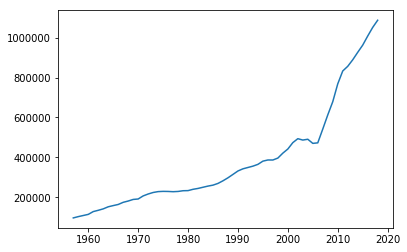

In [115]:
plt.plot(b[12]['year'],b[12]['value'])

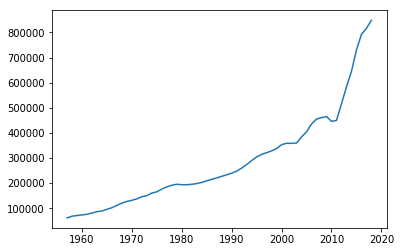

In [116]:
plt.plot(b[13]['year'],b[13]['value'])

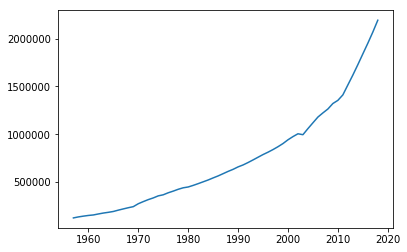

In [117]:
plt.plot(b[14]['year'],b[14]['value'])

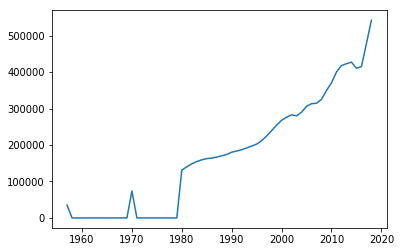

In [119]:
plt.plot(b[15]['year'],b[15]['value'])

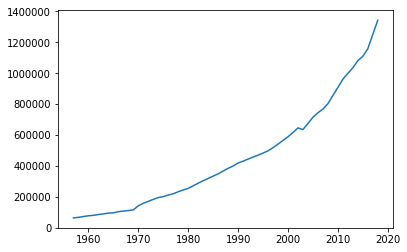

In [120]:
plt.plot(b[16]['year'],b[16]['value'])

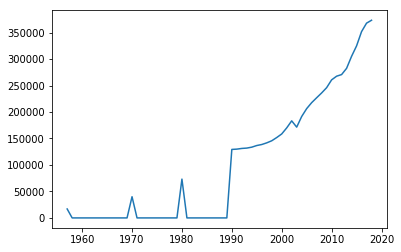

In [121]:
plt.plot(b[17]['year'],b[17]['value'])

In [122]:
len(b)

22

In [0]:
plt.plot(b[6]['year'],b[6]['value'])